chatbot using python


In [ ]:

!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:

import os
import pandas as pd
import openai

In [ ]:
data = pd.read_csv("twcs.csv")
data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
18312,23940,121143,True,Wed Nov 22 10:57:00 +0000 2017,@AirAsiaSupport Its been over a month since y...,NaN,23939.0
18313,23934,AirAsiaSupport,False,Wed Nov 08 06:36:59 +0000 2017,@121143 As per system your case has been escal...,NaN,23932.0
18314,23941,AirAsiaSupport,False,Wed Nov 01 08:53:55 +0000 2017,"@121144 Hi there, Ronald! How may we assist y...",NaN,23942.0
18315,23942,121144,True,Wed Nov 01 05:35:59 +0000 2017,@AirAsiaSupport,23941,NaN


In [ ]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [ ]:
data.dropna(inplace = True)
data = data.drop_duplicates()
data

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
...,...,...,...,...,...,...,...
18307,23935,121143,True,Mon Nov 20 21:56:54 +0000 2017,@AirAsiaSupport How much more time do you guys...,23936,23933.0
18308,23936,121143,True,Mon Nov 20 21:57:21 +0000 2017,@AirAsiaSupport Either you guys need a more co...,23937,23935.0
18309,23937,121143,True,Mon Nov 20 21:59:14 +0000 2017,@AirAsiaSupport please resolve this immediatel...,23938,23936.0
18310,23938,121143,True,Wed Nov 22 09:05:20 +0000 2017,@AirAsiaSupport Anyone there???????????,23939,23937.0


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
  new_text = [word for word in text.split(" ") if word not in stpwrds]
  return " ".join(new_text)

In [ ]:
import re

In [ ]:

from sklearn.metrics import ndcg_score, dcg_score

import numpy as np


# Relevance scores in Ideal order

true_relevance = np.asarray([[2,1,0,1,2]])


# Relevance scores in output order

relevance_score = np.asarray([[2,2,1,1,0]])


# DCG score

dcg = dcg_score(true_relevance, relevance_score)

print("DCG score : ", dcg)


# IDCG score

idcg = dcg_score(true_relevance, true_relevance)

print("IDCG score : ", idcg)


# Normalized DCG score

ndcg = dcg / idcg

print("nDCG score : ", ndcg)


# or we can use the scikit-learn ndcg_score package

print("nDCG score (from function) : ", ndcg_score(

    true_relevance, relevance_score) )

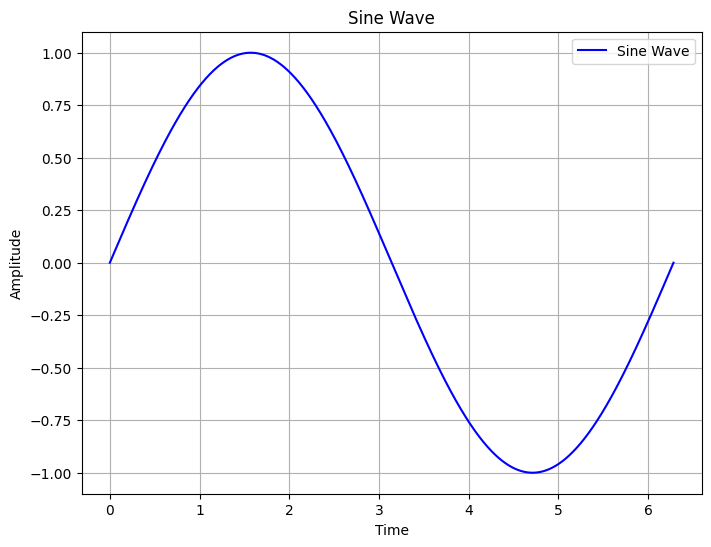

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
time = np.linspace(0, 2 * np.pi, 1000)
amplitude = 1.0
frequency = 1.0
sine_wave = amplitude * np.sin(frequency * time)
plt.figure(figsize=(8, 6))
plt.plot(time, sine_wave, label='Sine Wave', color='blue')
plt.title('Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



chatbot using python from great learning


In [ ]:
import numpy as np
import nltk
import string
import random

In [ ]:
f=open('/content/customerdataset.txt','r',errors = 'ignore')
raw_doc=f.read()
raw_doc=raw_doc.lower() #Converts text to lowercase
nltk.download('punkt') #Using the Punkt tokenizer
nltk.download('wordnet') #Using the WordNet dictionary
sent_tokens = nltk.sent_tokenize(raw_doc) #Converts doc to list of sentences
word_tokens = nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sent_tokens[:2]

['return the product:please enter the reason .',
 'damage :ok the delivery person will be assigned to retrieve the product,thank you.']

In [ ]:
word_tokens[:2]

['return', 'the']

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
GREET_INPUTS = ( "hello","yes")
GREET_RESPONSES = ["hello! do you need any help? type yes or no","type them : return the product  ; cancel  the order  "]
def greet(sentence):

    for word in sentence.split():
        if word.lower() in GREET_INPUTS:
            return random.choice(GREET_RESPONSES)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def response(user_response):
  robo1_response=''
  TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
  tfidf = TfidfVec.fit_transform(sent_tokens)
  vals = cosine_similarity(tfidf[-1], tfidf)
  idx=vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]
  if(req_tfidf==0):
    robo1_response=robo1_response+"I am sorry! I don't understand you"
    return robo1_response
  else:
    robo1_response = robo1_response+sent_tokens[idx]
    return robo1_response

In [ ]:
flag=True
print("BOT: Hello, I am the Support Assisstant. Let's have a conversation! starting with hello . Also, if you want to exit any time, just type Bye! or thanks")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("BOT: You are welcome..")
        else:
            if(greet(user_response)!=None):
                print("BOT: "+greet(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens=word_tokens+nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print("BOT: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("BOT: Goodbye! Take care <3 ")

BOT: Hello, I am the Support Assisstant. Let's have a conversation! starting with hello . Also, if you want to exit any time, just type Bye! or thanks
hello
BOT: hello! do you need any help? type yes or no
yes
BOT: hello! do you need any help? type yes or no
yes
BOT: hello! do you need any help? type yes or no
yes
BOT: type them : return the product  ; cancel  the order  
return the product
BOT: return the product:please enter the reason .
damage
BOT: damage :ok the delivery person will be assigned to retrieve the product,thank you.
cancel the order
BOT: cancel the order:please enter the reason .
low in cost
BOT: low in cost:ok,your order is canceled.
thankyou
BOT: I am sorry! I don't understand you
bye
BOT: Goodbye! Take care <3 
